In [49]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn import metrics
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from random import sample

In [50]:
# 读取全部数据，查看整个数据的分布情况
traindata = np.loadtxt("..\\traindata\\GG2-1-1.txt", usecols=np.arange(0,))
print(traindata.shape)


(10000, 16)


In [51]:
# 测试数据排除XYZ坐标后重新读取数据与标签
testdata = np.loadtxt("..\\testdata\\GG2-1-3.txt", usecols=np.arange(0,))
print(testdata.shape)

(2841837, 16)


In [52]:
#合并数据集
data = np.concatenate((traindata, testdata), axis=0)
print(data.shape)



(2851837, 16)


In [55]:
#随机选取100万条
train_set, test_set = train_test_split(data, test_size=0.35065117676, random_state=42)
print(test_set.shape)



(1000000, 16)


In [56]:
#以test_set作为真正的数据集保存100万条数据
np.savetxt('..\\data_set\\data_set.txt', test_set, delimiter='    ', fmt='%f')

In [57]:
#读取全部数据，查看整个数据的分布情况
# traindata = np.loadtxt("..\\traindata\\GG2-1-1.txt", usecols=np.arange(3, 15))
# trainlabel = np.loadtxt("..\\traindata\\GG2-1-1.txt", usecols=(15,))
# print(traindata.shape)
# print(trainlabel.shape)

In [58]:
# 测试数据排除XYZ坐标后重新读取数据与标签
# testdata = np.loadtxt("..\\testdata\\GG2-1-3.txt", usecols=np.arange(3, 15))
# testlabel = np.loadtxt("..\\testdata\\GG2-1-3.txt", usecols=(15,))
# print(testdata.shape)
# print(testdata.shape)

In [59]:
# 读取100万条数据
data=np.loadtxt("..\\data_set\\data_set.txt", usecols=np.arange(3, 15))
label=np.loadtxt("..\\data_set\\data_set.txt", usecols=(15,))
print(data.shape)
print(label.shape)
#读取测试数据xyz坐标，用于最后可视化输出
dataXYZ=np.loadtxt("..\\data_set\\data_set.txt", usecols=np.arange(0,3))
testXYZ=dataXYZ[10000:]

(1000000, 12)
(1000000,)


In [60]:
#选取前一万条作为训练数据
train_data=data[0:10000]
train_label=label[0:10000]
#后九十九万条为测试数据
test_data=data[10000:]
test_label=label[10000:]
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(10000, 12)
(10000,)
(990000, 12)
(990000,)


In [61]:
forestClassifer = RandomForestClassifier(n_estimators=100)
forestClassifer.fit(train_data,train_label)
score=forestClassifer.score(test_data,test_label)
print("原有模型得分：",score)

原有模型得分： 0.9629868686868687


In [62]:
#加载数据模型
score_list = []
score = 0
for i in range(10, 201, 10):
    forestClassifer = RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=90)
    forestClassifer.fit(train_data,train_label)
    score=forestClassifer.score(test_data,test_label)
    #计算得分
    score_list.append(score)
    print(score)

print("最大得分:", max(score_list), " n_estimators=", (score_list.index(max(score_list))+1) * 10)

0.9602919191919191
0.9620515151515151
0.9627161616161616
0.9627474747474748
0.9629151515151515
0.9629151515151515
0.9630444444444445
0.9631464646464647
0.9631939393939394
0.9632949494949495
0.9632868686868686
0.9632474747474747
0.9632070707070707
0.9632212121212121
0.9632333333333334
0.9632555555555555
0.9632777777777778
0.963279797979798
0.9633050505050506
0.9632969696969697
最大得分: 0.9633050505050506  n_estimators= 190


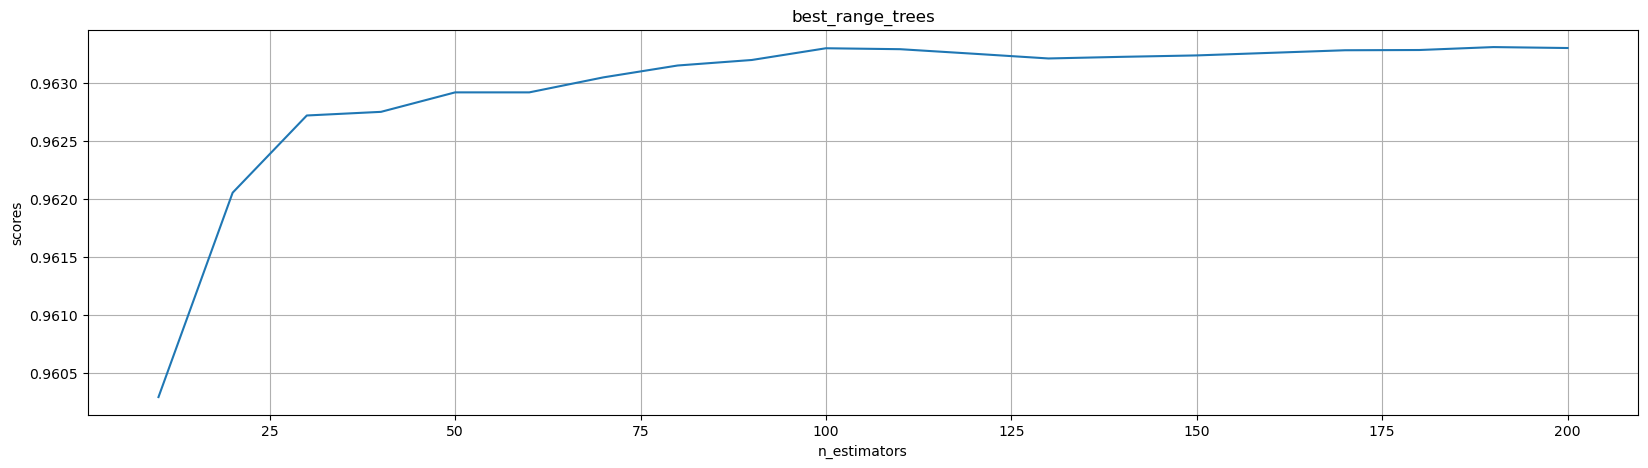

In [63]:
# 图形显示
plt.figure(figsize=[20,5])
plt.plot(range(10,201,10),score_list)
plt.xlabel('n_estimators')
plt.ylabel('scores')
plt.title('best_range_trees')
plt.grid(True)
plt.savefig('..//result//best_range_trees.png')
plt.show()



In [64]:
#加载数据模型
score_list = []
score = 0
for i in range(180, 200, 1):
    forestClassifer = RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=90)
    forestClassifer.fit(train_data,train_label)
    score=forestClassifer.score(test_data,test_label)
    #计算得分
    score_list.append(score)
    print(score)

print("最大得分:", max(score_list), " n_estimators=", (score_list.index(max(score_list))+180))

0.963279797979798
0.9633111111111111
0.9632989898989899
0.9633222222222222
0.9633101010101011
0.9633272727272727
0.9633131313131313
0.9633333333333334
0.9633222222222222
0.9633353535353535
0.9633050505050506
0.963320202020202
0.9633191919191919
0.9633575757575757
0.9633151515151516
0.9633414141414142
0.9633242424242424
0.9633333333333334
0.9633292929292929
0.9633353535353535
最大得分: 0.9633575757575757  n_estimators= 193


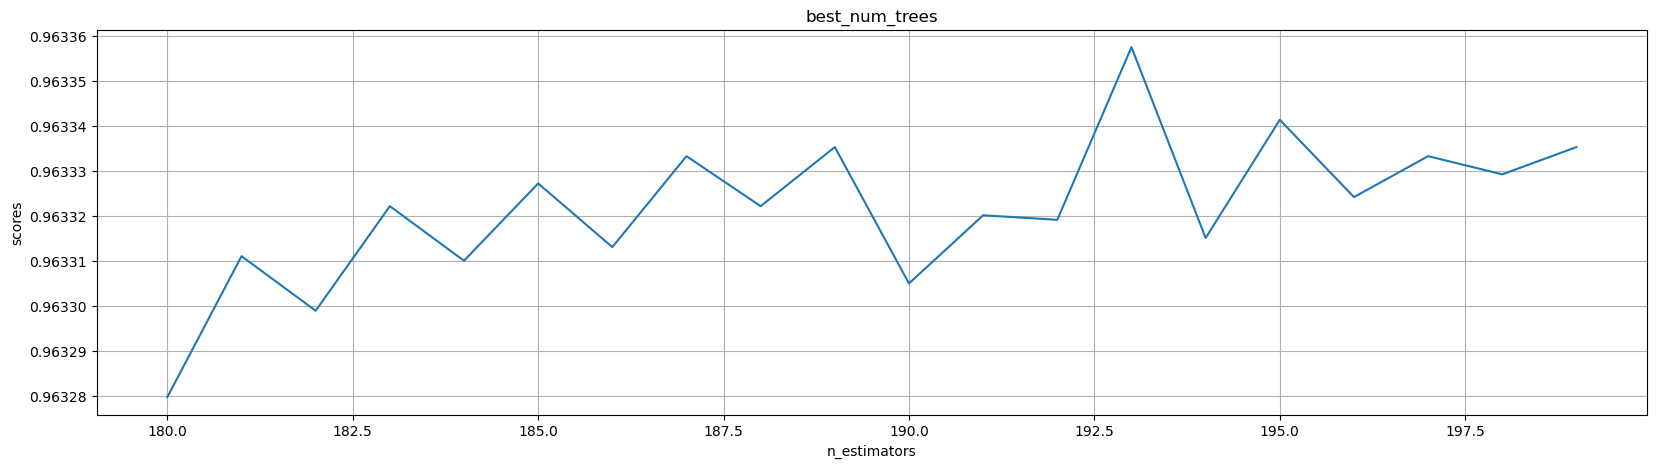

In [65]:
# 图形显示
plt.figure(figsize=[20,5])
plt.plot(range(180,200,1),score_list)
plt.xlabel('n_estimators')
plt.ylabel('scores')
plt.title('best_num_trees')
plt.grid(True)
plt.savefig('..//result//best_num_trees.png')
plt.show()


In [66]:
num_trees=193
#找到最优深度
score_list=[]
score=0
for i in range(5,35):
    forestClassifer = RandomForestClassifier(n_estimators=num_trees,n_jobs=-1,random_state=90,max_depth=i)
    forestClassifer.fit(train_data,train_label)
    score=forestClassifer.score(test_data,test_label)
    print(score)
    score_list.append(score)

print("最大得分:", max(score_list), " max_depth:", (score_list.index(max(score_list))+5))



0.9592686868686868
0.9606757575757576
0.9619686868686869
0.9624494949494949
0.9626242424242424
0.9629525252525253
0.9631272727272727
0.9633787878787878
0.9634444444444444
0.9633111111111111
0.9633868686868687
0.9631131313131314
0.9633757575757576
0.9634282828282829
0.963330303030303
0.9633363636363637
0.9633444444444444
0.9633323232323232
0.963360606060606
0.9633575757575757
0.9633575757575757
0.9633575757575757
0.9633575757575757
0.9633575757575757
0.9633575757575757
0.9633575757575757
0.9633575757575757
0.9633575757575757
0.9633575757575757
0.9633575757575757
最大得分: 0.9634444444444444  max_depth: 13


In [67]:
best_depth=13
#调整最大特征
score_list=[]
score=0
for i in range(5,35):
    forestClassifer = RandomForestClassifier(n_estimators=num_trees,n_jobs=-1,random_state=90,max_depth=best_depth,max_features=i)
    forestClassifer.fit(train_data,train_label)
    score=forestClassifer.score(test_data,test_label)
    print(score)
    score_list.append(score)

print("最大得分:", max(score_list), " max_features", (score_list.index(max(score_list))+5))

0.963120202020202
0.9629868686868687
0.9629818181818182
0.9629474747474748
0.9629444444444445
0.9628959595959596
0.9627636363636364
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
0.9625767676767677
最大得分: 0.963120202020202  max_features 5


In [70]:
#没有最优max_features
#调整min_samples_leaf
score_list=[]
score=0
for i in range(1,30):
    forestClassifer = RandomForestClassifier(n_estimators=num_trees,n_jobs=-1,random_state=90,max_depth=best_depth,min_samples_leaf=i)
    forestClassifer.fit(train_data,train_label)
    score=forestClassifer.score(test_data,test_label)
    print(score)
    score_list.append(score)

print("最大得分:", max(score_list), " min_samples_leaf", (score_list.index(max(score_list))+1))

0.9634444444444444
0.9633222222222222
0.9630666666666666
0.9629444444444445
0.9627979797979798
0.9626020202020202
0.962360606060606
0.9624343434343434
0.962160606060606
0.9618858585858586
0.9618767676767677
0.9620070707070707
0.961730303030303
0.9615606060606061
0.9613747474747475
0.9611141414141414
0.9608525252525253
0.9608373737373738
0.9605484848484849
0.9607040404040404
0.9604666666666667
0.9603666666666667
0.9605040404040404
0.9605636363636364
0.960349494949495
0.9604717171717172
0.9600252525252525
0.9600343434343435
0.9602131313131314
最大得分: 0.9634444444444444  min_samples_leaf 1


In [71]:
best_min_samples_leaf=1
#调整min_samples_split
score_list=[]
score=0
for i in range(2,22):
    forestClassifer = RandomForestClassifier(n_estimators=num_trees,n_jobs=-1,random_state=90,max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,min_samples_split=i)
    forestClassifer.fit(train_data,train_label)
    score=forestClassifer.score(test_data,test_label)
    print(score)
    score_list.append(score)

print("最大得分:", max(score_list), "min_samples_split", (score_list.index(max(score_list))+2))


0.9634444444444444
0.9630929292929293
0.9632050505050505
0.9630161616161617
0.9630848484848484
0.9629161616161617
0.9629878787878788
0.9632686868686868
0.962830303030303
0.9628494949494949
0.9626222222222223
0.9625777777777778
0.9625828282828283
0.9626
0.9624252525252526
0.9625626262626262
0.9625656565656565
0.9625262626262626
0.962440404040404
0.9624040404040404
最大得分: 0.9634444444444444 min_samples_split 2


In [73]:
best_min_samples_split=2
#调整计算方法
method=['gini','entropy']
score_list=[]
score=0
for i in method:
    forestClassifer = RandomForestClassifier(n_estimators=num_trees,n_jobs=-1,random_state=90,max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,min_samples_split=best_min_samples_split,criterion=i)
    forestClassifer.fit(train_data,train_label)
    score=forestClassifer.score(test_data,test_label)
    print(score)
    score_list.append(score)

print("最大得分:", max(score_list), "criterion", (score_list.index(max(score_list))))

0.9634444444444444
0.9630888888888889
最大得分: 0.9634444444444444 criterion 0


In [74]:
best_criterion='gini'

#最终模型
forestClassifer = RandomForestClassifier(n_estimators=num_trees,n_jobs=-1,random_state=90,max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,min_samples_split=best_min_samples_split,criterion='gini')
forestClassifer.fit(train_data,train_label)
fin_score=forestClassifer.score(test_data,test_label)

print('最终得分：',fin_score)

最终得分： 0.9634444444444444


In [75]:
#结果预测
y_predictedForest=forestClassifer.predict(test_data)

In [76]:
#精度评价：

total_seen_class = [0 for _ in range(2)]
total_correct_class = [0 for _ in range(2)]
total_pred_class = [0 for _ in range(2)]
total_iou_deno_class = [0 for _ in range(2)]
for l in range(2):
    total_seen_class[l] += np.sum((test_label == l))
    total_pred_class[l] += np.sum((y_predictedForest == l))
    total_correct_class[l] += np.sum((y_predictedForest == l) & (test_label == l))
    total_iou_deno_class[l] += np.sum((y_predictedForest == l) | (test_label == l))

correct = np.sum((y_predictedForest == test_label))
mIoU = np.mean(np.array(total_correct_class) / (np.array(total_iou_deno_class, dtype=np.float) + 1e-6))

OA = correct / len(test_label)
print("所有的样本数量：",total_seen_class[0]+total_seen_class[1])
print("实际预测正确样本数量",total_correct_class[0]+total_correct_class[1])
print("TP+FP+FN",total_iou_deno_class[0]+total_iou_deno_class[1])
print('OA: %f' % (OA))
print('mIoU: %f' % (mIoU))
print('wood precision: %f' % (total_correct_class[1] / total_pred_class[1]))
print('wood recall: %f' % (total_correct_class[1] / total_seen_class[1]))
print('leaf precision: %f' % (total_correct_class[0] / total_pred_class[0]))
print('leaf recall: %f' % (total_correct_class[0] / total_seen_class[0]))

所有的样本数量： 990000
实际预测正确样本数量 953810
TP+FP+FN 1026190
OA: 0.963444
mIoU: 0.735840
wood precision: 0.795244
wood recall: 0.586669
leaf precision: 0.971885
leaf recall: 0.989539


C:\Users\23571\AppData\Local\Temp\ipykernel_14656\1626137601.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mIoU = np.mean(np.array(total_correct_class) / (np.array(total_iou_deno_class, dtype=np.float) + 1e-6))


In [77]:
#结果输出
label_matrix = np.matrix(y_predictedForest)
result_label = np.transpose(label_matrix)
testlabel = test_label.reshape((-1, 1))
print(result_label.shape)
print(testlabel.shape)


(990000, 1)
(990000, 1)


In [78]:
#x,y,z,预测标签，真实标签
result_XYZL = np.concatenate((testXYZ, result_label, testlabel), axis=1)
np.savetxt('..\\result\\result.txt', result_XYZL, fmt='%f', delimiter='\t')